In [1]:
# Final comparison
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [13]:
#Create Result Dataframe, single run for file creation
#Result_df=pd.DataFrame( 
#    {'model' : ['k-NN','decision tree','random forest', 'svm linear', 'svm rbf','logistic','fc nn','cnn'],
#     'test accuracy' : [0,0,0,0,0,0,0,0]
#    })
#print(Result_df)

#Save Dataframe to file
#Result_df.to_csv('Result_df.csv', index=False, float_format='%.0f')
#Result_df=[]

In [4]:
# Load data
Result_df = pd.read_csv('Result_df.csv')
print(Result_df.head(9))

           model  test accuracy
0           k-NN          0.794
1  decision tree          0.658
2  random forest          0.797
3     svm linear          0.802
4        svm rbf          0.839
5       logistic          0.833
6          fc nn          0.839
7            cnn          0.816


# Final comparison of models

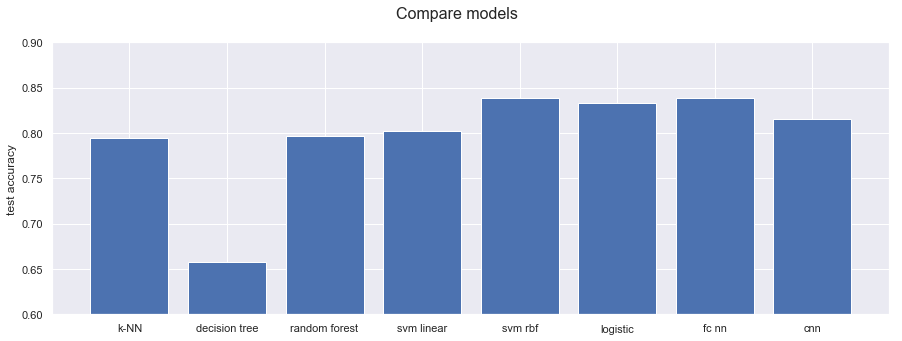

In [5]:
#Bar plot of test accuracy
mae_values = Result_df['test accuracy']
mae_titles = Result_df['model']
xcor = np.arange(len(mae_values))
plt.figure(figsize=(15,5))
plt.bar(xcor, mae_values)
plt.xticks(xcor, mae_titles)
plt.ylabel('test accuracy')
plt.suptitle('Compare models', fontsize=16)
plt.ylim((0.6,0.9))
plt.show()

->Explanation of choice: SVM RBF, because accuracy is highest

# Compute predictions

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
sns.set()

# Load Training data
with np.load('cifar4-train.npz', allow_pickle=False) as npz_file:
    cifar_train = dict(npz_file.items())

In [7]:
# Create X/y arrays
X = cifar_train['overfeat']
y = cifar_train['labels']
names = cifar_train['names']
pixels = cifar_train['pixels'].astype(np.float32)
pixels = pixels / 255

print('X:', X.shape, X.dtype)
print('y:', y.shape, y.dtype)
print('pixels:', pixels.shape, pixels.dtype)
print('names:', names)

X: (5000, 4096) float32
y: (5000,) int64
pixels: (5000, 3072) float32
names: ['truck' 'car' 'airplane' 'ship']


In [8]:
from sklearn.model_selection import train_test_split

# Convert the type of the input matrix to float
X = X.astype(np.float)

# Split data into train/test sets
X_tr, X_te, y_tr, y_te, Pix_tr, Pix_te = train_test_split(
    X, y, pixels, train_size=4000, test_size=1000, random_state=0, stratify=y)
print('Train set:', X_tr.shape, y_tr.shape)
print('Test set:', X_te.shape, y_te.shape)
print('Pixels set:', Pix_tr.shape, Pix_te.shape)

Train set: (4000, 4096) (4000,)
Test set: (1000, 4096) (1000,)
Pixels set: (4000, 3072) (1000, 3072)


In [9]:
# RBF SVM with  C: 6.00 and gamma:0.0001
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
RBF_svc = SVC(kernel='rbf',C=6, gamma=0.0001, random_state=0)
RBF_svc.fit(X_tr, y_tr)
RBF_svc_score=RBF_svc.score(X_te, y_te)
print('RBF SVM accuracy (test set): {:.4f}'.format(RBF_svc_score))

RBF SVM accuracy (test set): 0.8420


In [10]:
RBF_svc.predict(X_te)

array([3, 2, 1, 0, 2, 0, 2, 0, 0, 1, 3, 1, 2, 2, 2, 2, 3, 2, 1, 0, 0, 1,
       3, 3, 0, 1, 1, 3, 1, 0, 1, 2, 1, 3, 1, 1, 3, 2, 3, 3, 2, 0, 0, 1,
       2, 0, 3, 1, 1, 2, 0, 0, 1, 2, 2, 0, 3, 2, 2, 2, 3, 2, 1, 0, 2, 3,
       3, 0, 1, 3, 2, 3, 1, 2, 3, 3, 3, 3, 2, 1, 3, 2, 2, 0, 2, 1, 2, 0,
       1, 0, 0, 2, 1, 3, 1, 3, 1, 3, 0, 1, 3, 2, 2, 1, 1, 2, 1, 1, 0, 1,
       3, 1, 1, 1, 3, 2, 3, 1, 1, 1, 1, 3, 3, 0, 1, 2, 3, 2, 3, 2, 2, 3,
       0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 3, 1, 1, 3, 3, 2, 1, 2, 2, 2, 3,
       2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 3, 1,
       2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 3, 1, 1, 1, 3, 3, 1, 0, 1, 3, 0, 0,
       2, 2, 0, 0, 1, 3, 0, 3, 0, 2, 3, 3, 2, 0, 3, 1, 3, 2, 0, 3, 0, 3,
       1, 0, 1, 1, 0, 3, 2, 1, 0, 3, 1, 2, 1, 1, 2, 2, 3, 1, 3, 2, 1, 3,
       3, 2, 0, 0, 2, 0, 1, 3, 0, 2, 3, 3, 2, 0, 3, 1, 3, 3, 3, 3, 0, 3,
       1, 3, 0, 1, 0, 2, 1, 2, 1, 2, 0, 3, 1, 2, 1, 3, 2, 0, 3, 2, 3, 0,
       3, 1, 1, 0, 0, 2, 3, 3, 0, 2, 3, 2, 2, 2, 2,

In [11]:
# Load Test data 
with np.load('cifar4-test.npz', allow_pickle=False) as npz_file:
    cifar_test = dict(npz_file.items())
#print('It is a dictionary with keys:', list(cifar_test.keys()))
cifar_test 

{'pixels': array([[ 69,  69,  73, ...,  13,  16,  35],
        [156, 151, 159, ...,  86,  86, 114],
        [131, 147, 160, ...,  79,  88,  45],
        ...,
        [ 13,  13,  10, ..., 116, 117, 110],
        [ 91, 104, 137, ...,  32,  47,  42],
        [169, 176, 186, ..., 109, 119, 101]], dtype=uint8),
 'overfeat': array([[ 4.984375  , -0.01646423, -0.08233643, ...,  0.41723633,
          0.7314453 , -0.99902344],
        [ 2.7988281 , -0.9892578 ,  0.04446411, ..., -0.24121094,
          0.09814453, -1.2099609 ],
        [ 3.8574219 ,  0.9765625 ,  0.74121094, ..., -1.2802734 ,
         -0.39624023, -0.62890625],
        ...,
        [ 4.3476562 , -1.3476562 ,  0.41381836, ..., -2.7441406 ,
          0.50146484, -3.3007812 ],
        [ 3.0996094 , -1.1445312 ,  1.359375  , ..., -0.03120422,
          1.0751953 , -1.7285156 ],
        [ 2.8242188 , -1.0146484 ,  1.3681641 , ..., -0.8598633 ,
         -0.31347656, -1.6748047 ]], dtype=float32),
 'allow_pickle': array(False)}

In [12]:
# Create X/y arrays
Test_Overfeat = cifar_test['overfeat']
Test_Pixels = cifar_test['pixels'].astype(np.float32)
Test_Pixels = Test_Pixels / 255

print('Test_Overfeat:', Test_Overfeat.shape, Test_Overfeat.dtype)
print('Test_Pixels:', Test_Pixels.shape, Test_Pixels.dtype)

Test_Overfeat: (1000, 4096) float32
Test_Pixels: (1000, 3072) float32


In [13]:
RBF_svc_predict_labels=RBF_svc.predict(Test_Overfeat)

Check visual of predictsions versus showing image

In [14]:
# Reshape images: 32 by 32 with 3 (RGB) color channels
Test_Pixels_reshaped = Test_Pixels.reshape(-1, 32, 32, 3)
print('pixels_reshaped:', Test_Pixels_reshaped.shape, Test_Pixels_reshaped.dtype)
#print(pixels_reshaped)

pixels_reshaped: (1000, 32, 32, 3) float32


In [15]:
def draw_samples_Serie5(pics):       
    plt.subplots_adjust(wspace=0.01, hspace=0.3) 
    plt.title('Scree plot (cumulative sum)')
    
    for i in range(0, 5):
        counter=pics[i]
        #print(counter)
        plt.subplot(2,5, i+1)
        im = Test_Pixels_reshaped[counter,:,:,:]        
        plt.imshow(im, cmap='gnuplot2')    
        plt.title("{}".format(names[RBF_svc_predict_labels[counter]]), fontsize=12)
        plt.axis('off')        

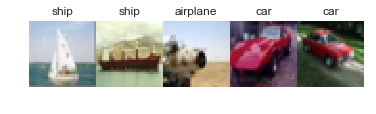

In [16]:
draw_samples_Serie5([5,10,15,25,65])

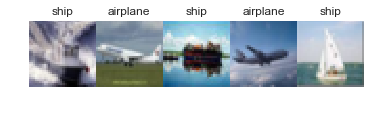

In [17]:
draw_samples_Serie5([1,2,3,4,5])

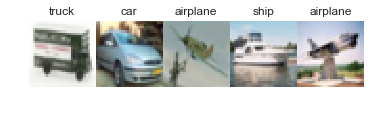

In [18]:
draw_samples_Serie5([21,22,23,24,26])

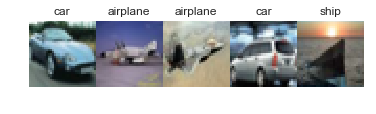

In [19]:
draw_samples_Serie5([121,122,223,224,326])

-> Observation: picture & label are matching

In [20]:
# Distribution of the predicted images
pd.value_counts(RBF_svc_predict_labels) / len(RBF_svc_predict_labels)

1    0.260
3    0.258
0    0.242
2    0.240
dtype: float64

-> Observation: almost equal distributed 4 different objects

In [21]:
# Save predicted labels   
np.save('test-predictions.npy', RBF_svc_predict_labels)